<a href="https://colab.research.google.com/github/Rawab/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [24]:
import pandas as pd

# Leading data to a pandas dataframe
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header = None)

#Checking for 306 observations
print(df.describe())

#Checking for missing values
print(df.isna().sum())

for i in df:
  print(df[i].unique())

# Renaming features
df.columns = ['age', 'year', 'ax_nodes', 'survival']

#Changing non-survival from 2 to 0
df_info = df.copy()

for i in range(len(df_info['survival'])):
  if df_info['survival'][i] == 2:
    df_info['survival'][i] = 0

print(df_info.head(8)) # It takes 8 observations to see a non-survivor

                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000
0    0
1    0
2    0
3    0
dtype: int64
[30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 83]
[64 62 65 59 58 60 66 61 67 63 69 68]
[ 1  3  0  2  4 10  9 30  7 13  6 15 21 11  5 23  8 20 52 14 19 16 12 24
 46 18 22 35 17 25 28]
[1 2]
   age  year  ax_nodes  survival
0   30    64         1         1
1   30    62         3         1
2   30    65         0         1
3   31    59         2         1
4   31    65     

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [27]:
# Table 1: Crosstabulation by nodes and (probability of) survival
pd.crosstab(df_info['survival'], pd.cut(df_info['ax_nodes'],4), normalize = 'columns')

ax_nodes,"(-0.052, 13.0]","(13.0, 26.0]","(26.0, 39.0]","(39.0, 52.0]"
survival,,,,
0,0.238267,0.541667,0.333333,0.5
1,0.761733,0.458333,0.666667,0.5


In [33]:
# Table 2: Crosstabulation by nodes and age
pd.crosstab(pd.cut(df_info['age'], 4), pd.cut(df_info['ax_nodes'],4), normalize='columns')

ax_nodes,"(-0.052, 13.0]","(13.0, 26.0]","(26.0, 39.0]","(39.0, 52.0]"
age,,,,
"(29.947, 43.25]",0.238267,0.208333,0.333333,0.5
"(43.25, 56.5]",0.404332,0.458333,0.000000,0.5
"(56.5, 69.75]",0.285199,0.291667,0.666667,0.0
"(69.75, 83.0]",0.072202,0.041667,0.000000,0.0


In [0]:
import matplotlib.pyplot as plt

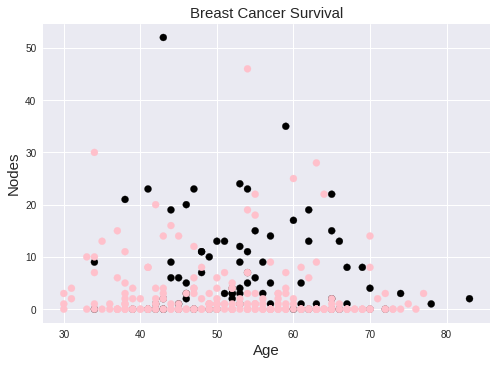

In [42]:
# Graph 1: Scatterplot of data with age (x), nodes (y), and survival (color)
# Death => Black, Survival => Pink
colors = []

for i in df_info['survival']:
  if i == 0:
    colors.append('black')
  else:
    colors.append('pink')

plt.scatter(df_info['age'], df_info['ax_nodes'], c = colors)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Nodes', fontsize=15)
plt.title('Breast Cancer Survival', fontsize=15)

plt.show();

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


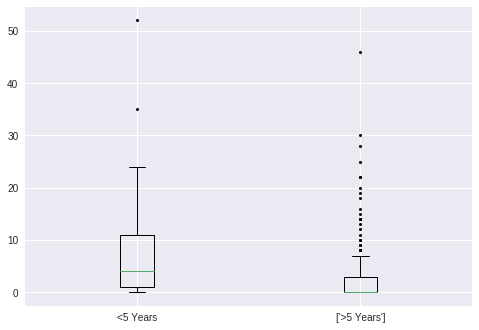

In [48]:
# Graph 2: Bar graph for year (grouped) and survival, distinguished by age(grouped)

grouped_data = df_info['ax_nodes'].groupby(df_info['survival'])
labels = ['<5 Years', ['>5 Years']]

plt.boxplot([group for survival, group in grouped_data], labels=labels,
           showfliers=True, sym='k.')


plt.show();

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**From table 1, an increase in survival detected axillary nodes seems to be related to a decrease in survival. However, those patients with 13 to 26 nodes had the highest probability of non-survival. **

---
**However, table 2 shows that women with 13 to 26 nodes were over 43 years or older about 80% of the time. This is notable when compared to the groups of women with more nodes. **

---
**Graph 1 shows us that around 20 or more detected nodes drastically increases the probability of death. Women with between 10 and 20 nodes who did not survive, were more often older women. This clears up the discrepancy from table 1.**

---

**We see from graph 2 how the women who survived for over 5 years are overwhelmingly those that had few detected nodes. The majority of the women who did not survive over 5 years had at least some nodes.**

---

From this data, we can conclude that increased nodes may cause death in the not-so-distant future.